In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import time
from collections import defaultdict as ddict

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [3]:
# bring in dataframe from csv file created at the end of Project_1_data_cleaning script

data = pd.read_csv('clean_data.csv')

### MVP plots

##### By station

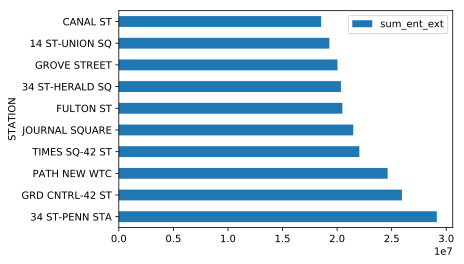

In [13]:
# compute total traffic (entries + exits, 'sum_ent_ext' column) per station for the entire data period and order from greatest to least
# set as new dataframe and limit to top 10
# plot as bar graph

by_station = data.groupby('STATION').sum().sort_values(by=['sum_ent_ext'], ascending=False)
traffic_by_station = pd.DataFrame(by_station)
by_station_top_ten = traffic_by_station.head(10)
by_station_top_ten.plot.barh(y='sum_ent_ext');

##### By day of week

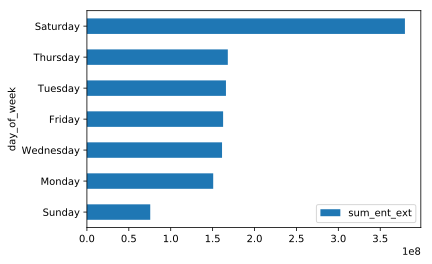

In [9]:
# compute total traffic per day of week for the entire data period and order from greatest to least
# set as new dataframe
# plot as bar graph

by_dow = data.groupby('day_of_week').sum().sort_values(by=['sum_ent_ext'], ascending = True)
by_dow = pd.DataFrame(by_dow)
by_dow.plot.barh(y='sum_ent_ext');

##### By time of day (delete this?)

In [10]:
# by time of day (?)
# delete this? not very telling... 

by_time_of_day = data.groupby(['TIME']).sum().sort_values(by=['sum_ent_ext'], ascending = True)
by_time_of_day = pd.DataFrame(by_time_of_day)
# by_time_of_day.plot.barh(y='sum_ent_ext');

### Get rid of unecessary columns (is this necessary?)

In [52]:
# drop unnecessary columns from the dataframe

slim = data.drop(['C/A', 'UNIT', 'SCP', 'LINENAME', 'DIVISION', 'DESC', 'ENTRIES', 'EXITS', 'Ent', 'Ext'], axis=1, inplace = True)
slim = pd.DataFrame(slim)
slim.head(3)

""


In [ ]:
# weekly schedule (from Natasha) (?)

# first gets rid of unecessary columns

slim.groupby('STATION').sum().sort_values(by=['sum_ent_ext'],ascending=False)

weekly_schedule = (slim.groupby(['day_of_week','STATION']).sum().reset_index())

weekly_all = pd.DataFrame(weekly_schedule)

by_day = weekly_all.set_index('day_of_week')

##### Time series analysis attempt

In [ ]:
# Create a time series plot of traffic each day of the week
# x-axis = day of the week (Monday through Sunday)
# y-axis = SUM() or MEDIAN() of traffic
# each line represents one of the top 10 stations



In [56]:
# sort by station, unit, scp, and date in order to organize dates in chronological order per station

by_station = data.sort_values(by = ['STATION', 'UNIT', 'SCP', 'DATE'])
# by_station = clean_merge.groupby('STATION').sum().sort_values(by=['sum_ent_ext'], ascending=True)
by_station.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,sum_ent_ext
28630,H007,R248,00-00-00,1 AV,L,BMT,2018-02-24,11:00:00,REGULAR,13248469,14794864,2,Saturday,369.0,694.0,1063.0
28631,H007,R248,00-00-00,1 AV,L,BMT,2018-02-24,15:00:00,REGULAR,13249209,14795967,2,Saturday,740.0,1103.0,1843.0
28632,H007,R248,00-00-00,1 AV,L,BMT,2018-02-24,19:00:00,REGULAR,13250036,14797030,2,Saturday,827.0,1063.0,1890.0
28633,H007,R248,00-00-00,1 AV,L,BMT,2018-02-24,23:00:00,REGULAR,13250668,14797982,2,Saturday,632.0,952.0,1584.0
28634,H007,R248,00-00-00,1 AV,L,BMT,2018-02-25,03:00:00,REGULAR,13250867,14798420,2,Sunday,199.0,438.0,637.0
28635,H007,R248,00-00-00,1 AV,L,BMT,2018-02-25,07:00:00,REGULAR,13250897,14798585,2,Sunday,30.0,165.0,195.0
28636,H007,R248,00-00-00,1 AV,L,BMT,2018-02-25,11:00:00,REGULAR,13251124,14799082,2,Sunday,227.0,497.0,724.0
28637,H007,R248,00-00-00,1 AV,L,BMT,2018-02-25,15:00:00,REGULAR,13251730,14799974,2,Sunday,606.0,892.0,1498.0
28638,H007,R248,00-00-00,1 AV,L,BMT,2018-02-25,19:00:00,REGULAR,13252338,14800937,2,Sunday,608.0,963.0,1571.0
28639,H007,R248,00-00-00,1 AV,L,BMT,2018-02-25,23:00:00,REGULAR,13252678,14801527,2,Sunday,340.0,590.0,930.0


In [58]:
# create Journal Square station data_frame
df_journal_square = data[data['STATION'] == 'JOURNAL SQUARE']
df_journal_square

# isolate time window at Journal Square (in attempt to do time series analysis)
df_journal_square_time_window = df_journal_square[(df_journal_square['DATE'] >= '2018-03-05') & (df_journal_square['DATE'] <= '2018-03-11')]
df_journal_square_time_window_sorted = df_journal_square_time_window.sort_values(by=['SCP','DATE'])
df_journal_square_time_window_sorted.head(50)

# sort by station, unit, scp, and date so we have an ordered time series
# df_journal_square.sort_values(by = ['STATION', 'UNIT', 'SCP', 'DATE'])
# No need to sort by, right?

# check how many units there are in Journal Square (to see if we can make a time series analysis without aggregating units)
# df_journal_square['UNIT'].nunique()

# NEXT UP: Create a Journal Square time series (on an hourly time scale) within a set period of dates

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,sum_ent_ext
297241,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-05,03:09:51,REGULAR,27929,11354,3,Monday,3.0,3.0,6.0
297242,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-05,07:21:51,REGULAR,27973,11362,3,Monday,44.0,8.0,52.0
297243,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-05,11:33:51,REGULAR,28234,11371,3,Monday,261.0,9.0,270.0
297244,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-05,15:45:51,REGULAR,28282,11397,3,Monday,48.0,26.0,74.0
297245,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-05,19:57:51,REGULAR,28321,11494,3,Monday,39.0,97.0,136.0
297246,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-06,00:09:51,REGULAR,28326,11511,3,Tuesday,5.0,17.0,22.0
297247,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-06,04:21:51,REGULAR,28327,11528,3,Tuesday,1.0,17.0,18.0
297248,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-06,08:33:51,REGULAR,28551,11537,3,Tuesday,224.0,9.0,233.0
297249,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-06,12:38:06,REGULAR,28766,11547,3,Tuesday,215.0,10.0,225.0
297250,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-03-06,16:50:06,REGULAR,28799,11584,3,Tuesday,33.0,37.0,70.0


In [60]:
# create WTC station data_frame
df_wtc = data[data['STATION'] == 'PATH NEW WTC']
df_wtc

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,sum_ent_ext
115907,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,05:46:05,REGULAR,129,1174,2,Saturday,0.0,8.0,8.0
115908,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,09:58:05,REGULAR,135,1348,2,Saturday,6.0,174.0,180.0
115909,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,14:10:05,REGULAR,143,1518,2,Saturday,8.0,170.0,178.0
115910,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,18:22:05,REGULAR,164,1646,2,Saturday,21.0,128.0,149.0
115911,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,22:34:05,REGULAR,180,1693,2,Saturday,16.0,47.0,63.0
115912,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-25,02:46:05,REGULAR,182,1710,2,Sunday,2.0,17.0,19.0
115913,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-25,06:58:05,REGULAR,184,1731,2,Sunday,2.0,21.0,23.0
115914,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-25,11:10:05,REGULAR,189,1844,2,Sunday,5.0,113.0,118.0
115915,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-25,15:22:05,REGULAR,198,1974,2,Sunday,9.0,130.0,139.0
115916,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-25,19:34:05,REGULAR,215,2053,2,Sunday,17.0,79.0,96.0


### Analysis for individual stations

In [ ]:
# Penn Station

penn = merge_data[merge_data['STATION']=='34 ST-PENN STA'].groupby(['day_of_week']).sum()
penn

In [61]:
# rename sum_ent_ext column to traffic -- move to data cleaning file!

data.rename(index=str, columns={"sum_ent_ext": "Traffic"}, inplace = True)

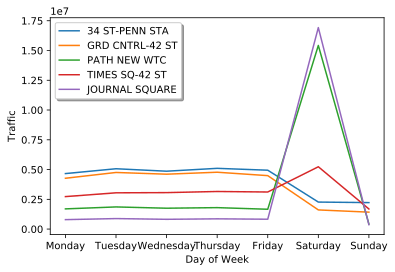

In [78]:
# line chart of total traffic per day for top stations

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

by_station = data.groupby(['STATION', 'day_of_week']).sum()

penn = by_station.loc['34 ST-PENN STA'].reindex(ordered_days)
gct = by_station.loc['GRD CNTRL-42 ST'].reindex(ordered_days)
wtc = by_station.loc['PATH NEW WTC'].reindex(ordered_days)
tsq = by_station.loc['TIMES SQ-42 ST'].reindex(ordered_days)
jsq = by_station.loc['JOURNAL SQUARE'].reindex(ordered_days)
fulton = by_station.loc['FULTON ST'].reindex(ordered_days)
herald = by_station.loc['34 ST-HERALD SQ'].reindex(ordered_days)
grove = by_station.loc['GROVE STREET'].reindex(ordered_days)
union = by_station.loc['14 ST-UNION SQ'].reindex(ordered_days)
canal = by_station.loc['CANAL ST'].reindex(ordered_days)

# penn.plot(y='Traffic')
# gct.plot(y='Traffic')

plt.plot(penn.loc[:, 'Traffic'])
plt.plot(gct.loc[:, 'Traffic'])
plt.plot(wtc.loc[:, 'Traffic'])
plt.plot(tsq.loc[:, 'Traffic'])
plt.plot(jsq.loc[:, 'Traffic'])
# plt.plot(fulton.loc[:, 'Traffic'])
# plt.plot(herald.loc[:, 'Traffic'])
# plt.plot(grove.loc[:, 'Traffic'])
# plt.plot(union.loc[:, 'Traffic'])
# plt.plot(canal.loc[:, 'Traffic'])

plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','PATH NEW WTC','TIMES SQ-42 ST','JOURNAL SQUARE'],
           shadow = True, loc = 0);
plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.show();

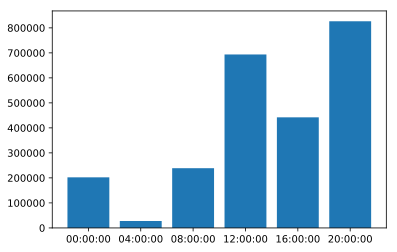

In [90]:
# Grand Central on Thursdays

ordered_times_1 = ['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00']
# ordered_times_2 = ['03:00:00', '07:00:00', '11:00:00', '15:00:00', '19:00:00', '23:00:00']

gct = data.loc[data['STATION'] == 'GRD CNTRL-42 ST'].loc[data['day_of_week'] == 'Thursday']
gct1 = gct.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)

# gct2 = gct.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_2)
plt.bar(ordered_times_1, gct1.loc[:, 'Traffic']);

**Some comments for the above code:**
    
- For gct1 line of code -- you can remove ".sort_values(by = ['Traffic'], ascending = False)" from the line and the result will be the same (the same goes for any following code blocks with that line)
- By only using those "ordered_times", we are removing a lot of data, and therefore could be masking the true story. 

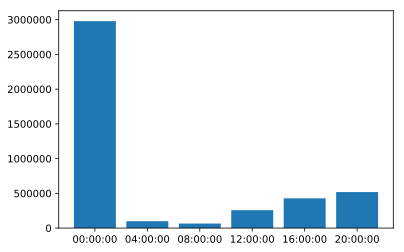

In [92]:
# Times Square on saturdays

tsq = data.loc[data['STATION'] == 'TIMES SQ-42 ST'].loc[data['day_of_week'] == 'Saturday']
tsq = tsq.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
plt.bar(ordered_times_1, tsq.loc[:, 'Traffic']);

In [94]:
# World Trade Center on Saturdays
# date time conversion still needs to be corrected due to 2019 date

wtc = data.loc[data['STATION'] == 'PATH NEW WTC'].loc[data['day_of_week'] == 'Saturday']
# wtc['TIME'].dt.round('H')
wtc['TIME2'] = pd.to_datetime(wtc['TIME'])
wtc['TIME3'] = wtc['TIME2'].dt.round('H')
wtc.head(20)
# wtc = wtc.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False)
# wtc.head()
# plt.bar(ordered_times_1, wtc.loc[:, 'Traffic'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,Traffic,TIME2,TIME3
115907,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,05:46:05,REGULAR,129,1174,2,Saturday,0.0,8.0,8.0,2019-04-03 05:46:05,2019-04-03 06:00:00
115908,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,09:58:05,REGULAR,135,1348,2,Saturday,6.0,174.0,180.0,2019-04-03 09:58:05,2019-04-03 10:00:00
115909,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,14:10:05,REGULAR,143,1518,2,Saturday,8.0,170.0,178.0,2019-04-03 14:10:05,2019-04-03 14:00:00
115910,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,18:22:05,REGULAR,164,1646,2,Saturday,21.0,128.0,149.0,2019-04-03 18:22:05,2019-04-03 18:00:00
115911,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,2018-02-24,22:34:05,REGULAR,180,1693,2,Saturday,16.0,47.0,63.0,2019-04-03 22:34:05,2019-04-03 23:00:00
115946,PTH22,R540,00-00-01,PATH NEW WTC,1,PTH,2018-02-24,05:27:34,REGULAR,172694,331082,2,Saturday,1.0,3.0,4.0,2019-04-03 05:27:34,2019-04-03 05:00:00
115947,PTH22,R540,00-00-01,PATH NEW WTC,1,PTH,2018-02-24,09:39:34,REGULAR,172695,331148,2,Saturday,1.0,66.0,67.0,2019-04-03 09:39:34,2019-04-03 10:00:00
115948,PTH22,R540,00-00-01,PATH NEW WTC,1,PTH,2018-02-24,13:51:34,REGULAR,172704,331258,2,Saturday,9.0,110.0,119.0,2019-04-03 13:51:34,2019-04-03 14:00:00
115949,PTH22,R540,00-00-01,PATH NEW WTC,1,PTH,2018-02-24,18:03:34,REGULAR,172731,331324,2,Saturday,27.0,66.0,93.0,2019-04-03 18:03:34,2019-04-03 18:00:00
115950,PTH22,R540,00-00-01,PATH NEW WTC,1,PTH,2018-02-24,22:15:34,REGULAR,172766,331358,2,Saturday,35.0,34.0,69.0,2019-04-03 22:15:34,2019-04-03 22:00:00
